<a href="https://colab.research.google.com/github/sujithcplusplus/facial_feature_mapping/blob/main/facial_feature_mapping_15_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import required libraries
import zipfile
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import glob
import os
import numpy as np
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.image as img

In [2]:
# Define 'build_model' function which takes the dataframe and two column number for (x,y) to build a model and 'model_name' to save the model
def build_model(df,col1,col2,model_name):
  required_data = df.iloc[:, [ col1, col2, 30]].copy()
  required_data.dropna(inplace=True)

  Img_paths = required_data.iloc[:, -1]
  y = required_data.iloc[:, :2]

  X = []

  for i in Img_paths:
    itensor = tf.image.rgb_to_grayscale(tf.convert_to_tensor(Image.open(i),dtype=tf.float32))
    X.append(itensor/255)
  X = np.array(X)

  X_train, X_val, y_train, y_val = train_test_split( X, y, test_size = 0.15,random_state = 42)

  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=(96,96,1)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(2,activation='linear'),
    tf.keras.layers.Lambda(lambda x: x * 96)
  ])

  model.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9),
                metrics = ['mae','mse'])
  history = model.fit(X_train,y_train,epochs=50,validation_data = (X_val,y_val))

  val_mae.append(history.history['val_mae'][-1])
  val_mse.append(history.history['val_mse'][-1])

  model.save(model_name)
  return 0

In [3]:
#Unzip the training data read attach the file paths to coordinates dataframe.
def setup():

  drive.mount('/content/drive')
  zip_ref = zipfile.ZipFile('/content/drive/MyDrive/facial feature mapping project/Dataset.zip','r')
  zip_ref.extractall()
  zip_ref.close()

  data = pd.read_csv('training.csv')

  paths = sorted(glob.glob('/content/images/train_images/*'))

  data['paths'] = paths

  return data

In [4]:
df = setup()

Mounted at /content/drive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [6]:
val_mae = []
val_mse = []

In [7]:
model_names = ['left_eye_center_model',
               'right_eye_center_model',
               'left_eye_inner_corner_model',
               'left_eye_outer_corner_model',
               'right_eye_inner_corner_model',
               'right_eye_outer_corner_model',
               'left_eyebrow_inner_end_model',
               'left_eyebrow_outer_end_model',
               'right_eyebrow_inner_end_model',
               'right_eyebrow_outer_end_model',
               'nose_tip_model',
               'mouth_left_corner_model',
               'mouth_right_corner_model',
               'mouth_center_top_lip_model',
               'mouth_center_bottom_lip'
               ]

In [ ]:
for i in range(0,15)
build_model(df,col1,col2,model_names[col1/2])
col1+=2
col2+=2
col1,col2

In [8]:
for i in range(0, 15):
    print(df.columns[2*i], df.columns[(2*i)+1], model_names[i])

left_eye_center_x left_eye_center_y left_eye_center_model
right_eye_center_x right_eye_center_y right_eye_center_model
left_eye_inner_corner_x left_eye_inner_corner_y left_eye_inner_corner_model
left_eye_outer_corner_x left_eye_outer_corner_y left_eye_outer_corner_model
right_eye_inner_corner_x right_eye_inner_corner_y right_eye_inner_corner_model
right_eye_outer_corner_x right_eye_outer_corner_y right_eye_outer_corner_model
left_eyebrow_inner_end_x left_eyebrow_inner_end_y left_eyebrow_inner_end_model
left_eyebrow_outer_end_x left_eyebrow_outer_end_y left_eyebrow_outer_end_model
right_eyebrow_inner_end_x right_eyebrow_inner_end_y right_eyebrow_inner_end_model
right_eyebrow_outer_end_x right_eyebrow_outer_end_y right_eyebrow_outer_end_model
nose_tip_x nose_tip_y nose_tip_model
mouth_left_corner_x mouth_left_corner_y mouth_left_corner_model
mouth_right_corner_x mouth_right_corner_y mouth_right_corner_model
mouth_center_top_lip_x mouth_center_top_lip_y mouth_center_top_lip_model
mouth_ce

In [9]:
for i in range(0,15):
  build_model(df,(2*i),(2*i)+1,model_names[i])

Epoch 1/50
187/187 [==============================] - 13s 17ms/step - loss: 4.3971 - mae: 4.3971 - mse: 87.0293 - val_loss: 2.3773 - val_mae: 2.3773 - val_mse: 11.2913
Epoch 2/50
187/187 [==============================] - 3s 15ms/step - loss: 2.3005 - mae: 2.3005 - mse: 11.8963 - val_loss: 2.6917 - val_mae: 2.6917 - val_mse: 13.0949
Epoch 3/50
187/187 [==============================] - 3s 15ms/step - loss: 2.2765 - mae: 2.2765 - mse: 11.7589 - val_loss: 2.4143 - val_mae: 2.4143 - val_mse: 11.5402
Epoch 4/50
187/187 [==============================] - 3s 15ms/step - loss: 2.2424 - mae: 2.2424 - mse: 11.5809 - val_loss: 2.0748 - val_mae: 2.0748 - val_mse: 9.8760
Epoch 5/50
187/187 [==============================] - 3s 14ms/step - loss: 2.2500 - mae: 2.2500 - mse: 11.6099 - val_loss: 2.1193 - val_mae: 2.1193 - val_mse: 9.9868
Epoch 6/50
187/187 [==============================] - 3s 14ms/step - loss: 2.2310 - mae: 2.2310 - mse: 11.5222 - val_loss: 2.1588 - val_mae: 2.1588 - val_mse: 10.4717

In [10]:
print(f"Mean Absolute Error is:{np.array(val_mae).mean()}")
print(f"Mean Square Error is:{np.array(val_mse).mean()}")

Mean Absolute Error is:2.6395238240559897
Mean Square Error is:14.592045497894286


In [11]:
test_image_paths =sorted(glob.glob('/content/images/test_images/*'))

In [12]:
test_images = []
for i in test_image_paths:
  tim = tf.image.rgb_to_grayscale(tf.convert_to_tensor(Image.open(i),dtype = tf.float32))/255.
  test_images.append(tim)

test_images = np.array(test_images)

In [13]:
model_0  = tf.keras.models.load_model(model_names[0])
model_1  = tf.keras.models.load_model(model_names[1])
model_2  = tf.keras.models.load_model(model_names[2])
model_3  = tf.keras.models.load_model(model_names[3])
model_4  = tf.keras.models.load_model(model_names[4])
model_5  = tf.keras.models.load_model(model_names[5])
model_6  = tf.keras.models.load_model(model_names[6])
model_7  = tf.keras.models.load_model(model_names[7])
model_8  = tf.keras.models.load_model(model_names[8])
model_9  = tf.keras.models.load_model(model_names[9])
model_10 = tf.keras.models.load_model(model_names[10])
model_11 = tf.keras.models.load_model(model_names[11])
model_12 = tf.keras.models.load_model(model_names[12])
model_13 = tf.keras.models.load_model(model_names[13])
model_14 = tf.keras.models.load_model(model_names[14])

In [14]:
  p_0 = model_0.predict(test_images)


56/56 [==============================] - 1s 8ms/step


In [20]:
p_0.shape

(1783, 2)

In [22]:
p_0 = model_0.predict(test_images)
p_1 = model_1.predict(test_images)
p_2 = model_2.predict(test_images)
p_3 = model_3.predict(test_images)
p_4 = model_4.predict(test_images)
p_5 = model_5.predict(test_images)
p_6 = model_6.predict(test_images)
p_7 = model_7.predict(test_images)
p_8 = model_8.predict(test_images)
p_9 = model_9.predict(test_images)
p_10 = model_10.predict(test_images)
p_11 = model_11.predict(test_images)
p_12 = model_12.predict(test_images)
p_13 = model_13.predict(test_images)
p_14 = model_14.predict(test_images)

56/56 [==============================] - 0s 3ms/step


In [25]:
predictions = pd.DataFrame(np.concatenate([p_0, p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, p_9, p_10, p_11, p_12, p_13, p_14], axis=1), columns=df.columns[:-1])

In [26]:
predictions.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.976776,37.499985,30.636349,37.207886,58.174217,38.372700,71.602539,37.667965,37.063866,38.911293,...,48.585442,65.272964,62.908424,75.035744,33.377647,75.514488,47.662361,71.412613,48.982029,79.738159
1,66.976852,37.501701,30.590332,37.121853,58.035263,38.450348,71.838837,37.765568,37.203106,38.875874,...,48.495102,65.080162,62.844635,75.029617,33.372414,75.541695,47.743290,71.712097,48.919434,79.219360
2,66.975975,37.500080,30.621872,37.162369,58.185944,38.397369,71.649269,37.682262,37.037743,38.891800,...,48.546295,64.949760,62.881130,75.026352,33.360271,75.542770,47.736614,71.574059,48.932888,79.691803
3,66.977768,37.500824,30.650740,37.216408,57.872498,38.427959,71.599174,37.559975,37.585449,39.369560,...,48.810646,66.245224,62.969387,75.085052,33.207882,75.526749,47.700275,71.365662,48.951107,78.577271
4,66.975510,37.501846,30.664541,37.233524,57.863632,38.477707,71.727287,37.707352,37.466961,39.126194,...,48.837982,66.447525,62.931290,75.071892,33.306099,75.515045,47.746708,71.675858,49.093292,78.262169


Test Image Number : 391


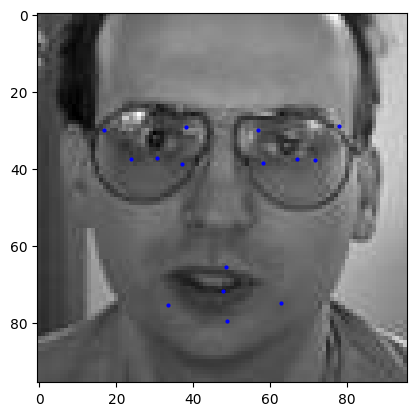

In [50]:
IMGNo = random.randint(0,len(test_images)-1)
print(f"Test Image Number : {IMGNo}")
testImage = img.imread(test_image_paths[IMGNo])
plt.imshow(testImage,cmap='gray')
plt.plot(predictions.iloc[IMGNo,::2],predictions.iloc[IMGNo,1::2],'bo', markersize=2);